In [1]:
import pandas as pd
import os
from time import time
import numpy as np
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
# Import supplementary visualization code visuals.py
#import visuals as vs

# Pretty display for notebooks
%matplotlib inline


In [2]:
path_to_data= "/home/ubuntu/udacity/CodeGladiator/invesco/data"

investment_exp_file = "imputed_investment_exp.csv"


In [3]:
data = pd.read_csv(os.path.join(path_to_data, investment_exp_file))


checking feature relevance

In [4]:
from sklearn.preprocessing import LabelEncoder
var_mod = list(data.columns)
le = LabelEncoder()
for i in var_mod:
    print(i)
    data[i] = le.fit_transform(data[i])
data.dtypes 

Unique_Investment_Id
Morningstar Category
Month
Investment
Rating
1 Yr % Rank
3 Yr % Rank
5 Yr % Rank
10 Yr % Rank
1 Yr Return
3 Yr Return
5 Yr Return
10 Yr Return
1 Yr Excess Return vs Primary Ix
3 Yr Excess Return vs Primary Ix
5 Yr Excess Return vs Primary Ix
10 Yr Excess Return vs Primary Ix
1 Yr Excess Return vs Category Ix
3 Yr Excess Return vs Category Ix
5 Yr Excess Return vs Category Ix
10 Yr Excess Return vs Category Ix
Net Flows
Morningstar_Category_Rating


Unique_Investment_Id                  int64
Morningstar Category                  int64
Month                                 int64
Investment                            int64
Rating                                int64
1 Yr % Rank                           int64
3 Yr % Rank                           int64
5 Yr % Rank                           int64
10 Yr % Rank                          int64
1 Yr Return                           int64
3 Yr Return                           int64
5 Yr Return                           int64
10 Yr Return                          int64
1 Yr Excess Return vs Primary Ix      int64
3 Yr Excess Return vs Primary Ix      int64
5 Yr Excess Return vs Primary Ix      int64
10 Yr Excess Return vs Primary Ix     int64
1 Yr Excess Return vs Category Ix     int64
3 Yr Excess Return vs Category Ix     int64
5 Yr Excess Return vs Category Ix     int64
10 Yr Excess Return vs Category Ix    int64
Net Flows                             int64
Morningstar_Category_Rating     

In [5]:
# Imports
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
old_data = data.copy(deep=True)
data.drop(['Unique_Investment_Id','Month'],axis=1,inplace=True)
# Create list to loop through
dep_vars = list(data.columns)


# Create loop to test each feature as a dependent variable
for var in dep_vars:

    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([var], axis = 1)
    # Confirm drop
    # display(new_data.head(2))

    # Create feature Series (Vector)
    new_feature = pd.DataFrame(data.loc[:, var])
    # Confirm creation of new feature
    # display(new_feature.head(2))

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    # Instantiate
    dtr = DecisionTreeRegressor(random_state=0)
    # Fit
    dtr.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    # Returns R^2
    score = dtr.score(X_test, y_test)
    print('R2 score for {} as dependent variable: {}'.format(var, score))

R2 score for Morningstar Category as dependent variable: 0.996107477814227
R2 score for Investment as dependent variable: 0.9611140264413631
R2 score for Rating as dependent variable: 0.8558922434582602
R2 score for 1 Yr % Rank as dependent variable: 0.914911307167082
R2 score for 3 Yr % Rank as dependent variable: 0.9512721220179973
R2 score for 5 Yr % Rank as dependent variable: 0.9567758374675351
R2 score for 10 Yr % Rank as dependent variable: 0.9585836572998243
R2 score for 1 Yr Return as dependent variable: 0.8326971453503801
R2 score for 3 Yr Return as dependent variable: 0.9168293745343523
R2 score for 5 Yr Return as dependent variable: 0.9246353702130272
R2 score for 10 Yr Return as dependent variable: 0.9380205604146116
R2 score for 1 Yr Excess Return vs Primary Ix as dependent variable: 0.9262585928562669
R2 score for 3 Yr Excess Return vs Primary Ix as dependent variable: 0.9619383701237435
R2 score for 5 Yr Excess Return vs Primary Ix as dependent variable: 0.9660947539172

,Morningstar Category,Investment,Rating,1 Yr % Rank,3 Yr % Rank,5 Yr % Rank,10 Yr % Rank,1 Yr Return,3 Yr Return,5 Yr Return,...,1 Yr Excess Return vs Primary Ix,3 Yr Excess Return vs Primary Ix,5 Yr Excess Return vs Primary Ix,10 Yr Excess Return vs Primary Ix,1 Yr Excess Return vs Category Ix,3 Yr Excess Return vs Category Ix,5 Yr Excess Return vs Category Ix,10 Yr Excess Return vs Category Ix,Net Flows,Morningstar_Category_Rating
0,4,297,2,92,86,88,0,4900,5919,1897,...,284,2811,2183,5794,11,3086,3165,5588,762,2
1,4,297,2,92,84,85,0,2885,4214,1727,...,201,2743,1854,5794,4,2581,2534,5588,660,2
2,4,297,2,84,86,85,0,9303,7256,1483,...,619,3365,2056,5794,16,2521,2596,5588,614,2
3,4,297,2,47,87,65,0,12974,9502,4643,...,6963,4181,2789,5794,78,2788,2913,5588,962,2
4,4,297,2,51,84,71,0,12941,10452,5482,...,9027,4867,2759,5794,571,3266,3867,5588,986,2


In [7]:
import visuals as vs
from sklearn.decomposition import PCA

In [8]:
good_data = data

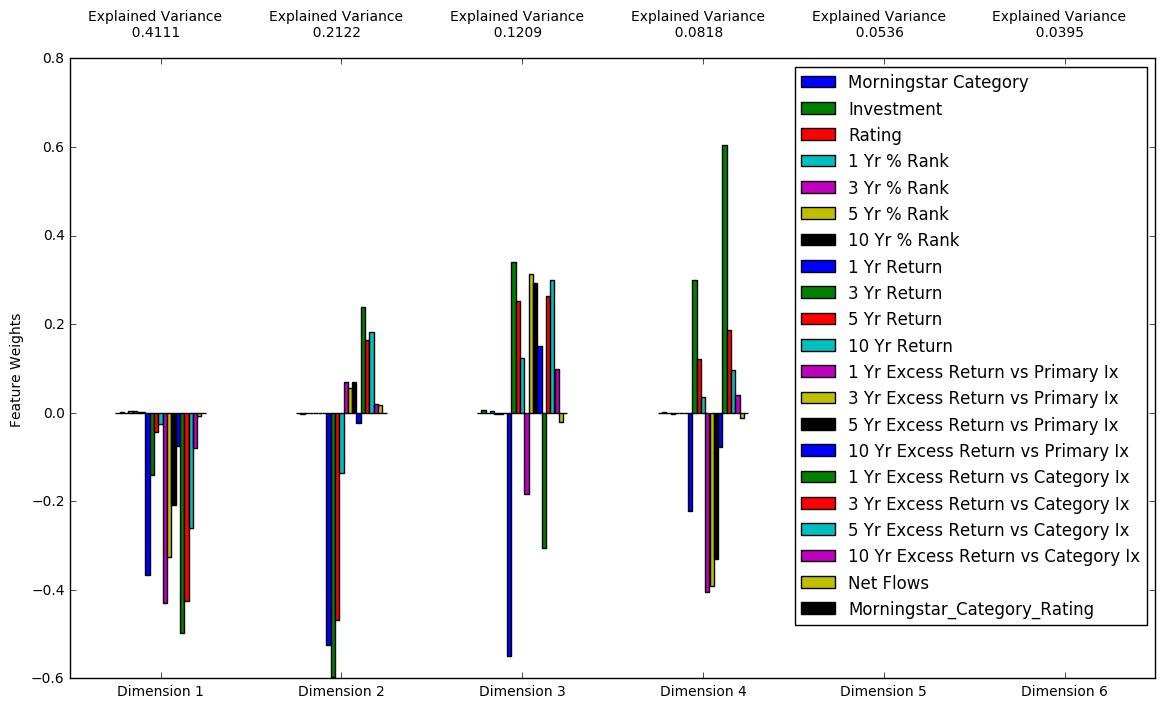

In [9]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)


# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [10]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)


# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

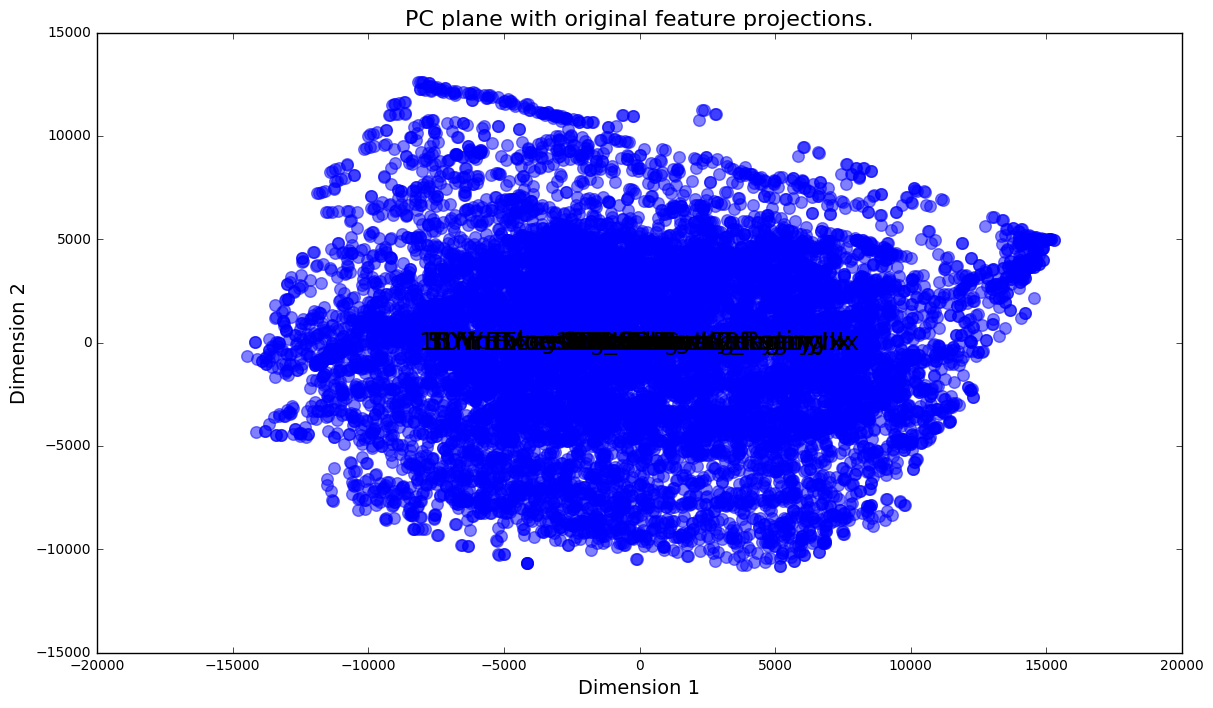

In [13]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
# Imports
from sklearn.mixture import GMM
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
# Create range of clusters 
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [17]:
# Loop through clusters
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GMM(n_components=n_clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_


    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='mahalanobis')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.3242716452799408
For n_clusters = 3. The average silhouette_score is : 0.33297073971696206
For n_clusters = 4. The average silhouette_score is : 0.32233670776940804
For n_clusters = 5. The average silhouette_score is : 0.3268935049022833
For n_clusters = 6. The average silhouette_score is : 0.3294134009157749
For n_clusters = 7. The average silhouette_score is : 0.31730807894943475
For n_clusters = 8. The average silhouette_score is : 0.29785043817621293
For n_clusters = 9. The average silhouette_score is : 0.23800235959402807
For n_clusters = 10. The average silhouette_score is : 0.2229770853614585


In [18]:
# Loop through clusters
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_



    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='euclidean')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.3890336824179476
For n_clusters = 3. The average silhouette_score is : 0.33978560452325574
For n_clusters = 4. The average silhouette_score is : 0.3438777574908558
For n_clusters = 5. The average silhouette_score is : 0.33680929495001405
For n_clusters = 6. The average silhouette_score is : 0.3472865111886108
For n_clusters = 7. The average silhouette_score is : 0.3495003645151225
For n_clusters = 8. The average silhouette_score is : 0.3478387345364642
For n_clusters = 9. The average silhouette_score is : 0.34183244827356807
For n_clusters = 10. The average silhouette_score is : 0.34213604223372873


In [34]:
# Extra code because we ran a loop on top and this resets to what we want
clusterer = GMM(n_components=7).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_


In [36]:
# Extra code because we ran a loop on top and this resets to what we want
clusterer = KMeans(n_clusters=7).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_

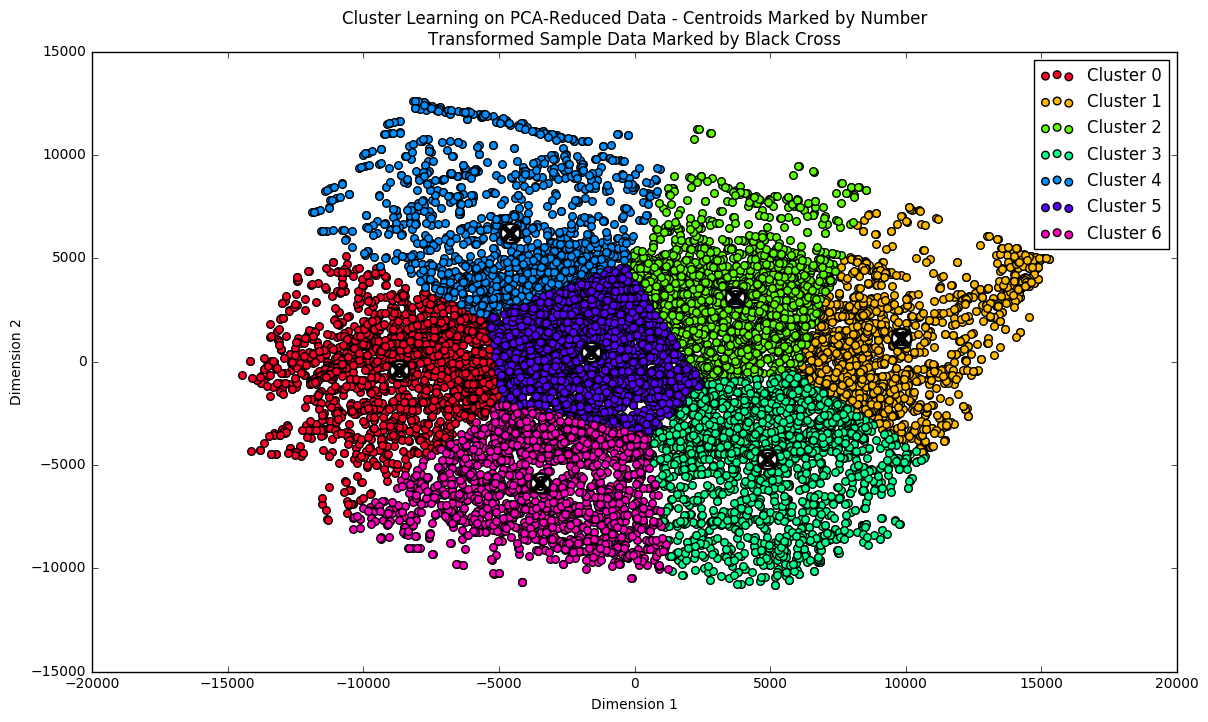

In [37]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers,centers)

In [47]:
preds.shape[0]

14208

In [53]:
predictions = pd.DataFrame(data=preds, index= range(preds.shape[0]) , columns=['investment_vehicle_segment'])  

In [55]:
predictions.describe()

,investment_vehicle_segment
count,14208.000000
mean,3.169623
std,1.955643
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [56]:
predictions.to_csv("../data/investment_vehicle_segment.csv")

In [41]:
data.count()

Morningstar Category                  14208
Investment                            14208
Rating                                14208
1 Yr % Rank                           14208
3 Yr % Rank                           14208
5 Yr % Rank                           14208
10 Yr % Rank                          14208
1 Yr Return                           14208
3 Yr Return                           14208
5 Yr Return                           14208
10 Yr Return                          14208
1 Yr Excess Return vs Primary Ix      14208
3 Yr Excess Return vs Primary Ix      14208
5 Yr Excess Return vs Primary Ix      14208
10 Yr Excess Return vs Primary Ix     14208
1 Yr Excess Return vs Category Ix     14208
3 Yr Excess Return vs Category Ix     14208
5 Yr Excess Return vs Category Ix     14208
10 Yr Excess Return vs Category Ix    14208
Net Flows                             14208
Morningstar_Category_Rating           14208
dtype: int64